In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from sklearn.ensemble import GradientBoostingRegressor as gb
from sklearn.ensemble import RandomForestRegressor as rf

import datetime as dt
from sklearn.metrics import mean_absolute_error

In [3]:
train_data=pd.read_csv('train_fwYjLYX.csv')
train_data

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0
...,...,...,...,...,...,...
80397,2019-07-19,2,NaN,WEST BENGAL,NaN,1886.0
80398,2019-07-20,2,NaN,WEST BENGAL,NaN,1480.0
80399,2019-07-21,2,NaN,WEST BENGAL,NaN,1028.0
80400,2019-07-22,2,NaN,WEST BENGAL,NaN,1946.0


In [4]:
test_data=pd.read_csv('test_1eLl9Yf.csv')
test_data

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1
...,...,...,...
175,176,2019-10-20,2
176,177,2019-10-21,2
177,178,2019-10-22,2
178,179,2019-10-23,2


In [5]:
train_data["ds"] = "train"
test_data["ds"] = "test"
final_data=pd.concat([train_data,test_data])

In [6]:
final_data

,application_date,branch_id,case_count,ds,id,segment,state,zone
0,2017-04-01,1.0,40.0,train,NaN,1,WEST BENGAL,EAST
1,2017-04-03,1.0,5.0,train,NaN,1,WEST BENGAL,EAST
2,2017-04-04,1.0,4.0,train,NaN,1,WEST BENGAL,EAST
3,2017-04-05,1.0,113.0,train,NaN,1,WEST BENGAL,EAST
4,2017-04-07,1.0,76.0,train,NaN,1,WEST BENGAL,EAST
...,...,...,...,...,...,...,...,...
175,2019-10-20,NaN,NaN,test,176.0,2,NaN,NaN
176,2019-10-21,NaN,NaN,test,177.0,2,NaN,NaN
177,2019-10-22,NaN,NaN,test,178.0,2,NaN,NaN
178,2019-10-23,NaN,NaN,test,179.0,2,NaN,NaN


In [7]:
final_data['application_date']= pd.to_datetime(final_data['application_date']) 
  

In [9]:
final_data=final_data.groupby(['application_date','segment','ds'],as_index=False)['case_count'].sum()
final_data

,application_date,segment,ds,case_count
0,2017-04-01,1,train,299.0
1,2017-04-01,2,train,897.0
2,2017-04-02,2,train,605.0
3,2017-04-03,1,train,42.0
4,2017-04-03,2,train,2016.0
...,...,...,...,...
1825,2019-10-20,2,test,0.0
1826,2019-10-21,2,test,0.0
1827,2019-10-22,2,test,0.0
1828,2019-10-23,2,test,0.0


In [10]:
final_data['application_date'].nunique()

937

In [11]:
train_data_segment1=final_data[final_data['segment']==1]


In [12]:
train_data_segment1

,application_date,segment,ds,case_count
0,2017-04-01,1,train,299.0
3,2017-04-03,1,train,42.0
5,2017-04-04,1,train,23.0
7,2017-04-05,1,train,1530.0
10,2017-04-07,1,train,1341.0
...,...,...,...,...
1796,2019-09-26,1,test,0.0
1798,2019-09-27,1,test,0.0
1800,2019-09-28,1,test,0.0
1802,2019-09-29,1,test,0.0


In [13]:
train_data_segment2=final_data[final_data['segment']==2]
train_data_segment2

,application_date,segment,ds,case_count
1,2017-04-01,2,train,897.0
2,2017-04-02,2,train,605.0
4,2017-04-03,2,train,2016.0
6,2017-04-04,2,train,2245.0
8,2017-04-05,2,train,2415.0
...,...,...,...,...
1825,2019-10-20,2,test,0.0
1826,2019-10-21,2,test,0.0
1827,2019-10-22,2,test,0.0
1828,2019-10-23,2,test,0.0


In [14]:
#train_data_segment2.drop(['branch_id','zone','state'],axis=1,inplace=True)

In [15]:
#train_data_segment1.drop(['branch_id','zone','state'],axis=1,inplace=True)

In [16]:
train_data_segment1

,application_date,segment,ds,case_count
0,2017-04-01,1,train,299.0
3,2017-04-03,1,train,42.0
5,2017-04-04,1,train,23.0
7,2017-04-05,1,train,1530.0
10,2017-04-07,1,train,1341.0
...,...,...,...,...
1796,2019-09-26,1,test,0.0
1798,2019-09-27,1,test,0.0
1800,2019-09-28,1,test,0.0
1802,2019-09-29,1,test,0.0


In [17]:
train_data_segment2

,application_date,segment,ds,case_count
1,2017-04-01,2,train,897.0
2,2017-04-02,2,train,605.0
4,2017-04-03,2,train,2016.0
6,2017-04-04,2,train,2245.0
8,2017-04-05,2,train,2415.0
...,...,...,...,...
1825,2019-10-20,2,test,0.0
1826,2019-10-21,2,test,0.0
1827,2019-10-22,2,test,0.0
1828,2019-10-23,2,test,0.0


In [18]:
#train_data_segment1.drop(['application_date'],axis=1,inplace=True)

# for segment 1

In [19]:
train_data_segment1

,application_date,segment,ds,case_count
0,2017-04-01,1,train,299.0
3,2017-04-03,1,train,42.0
5,2017-04-04,1,train,23.0
7,2017-04-05,1,train,1530.0
10,2017-04-07,1,train,1341.0
...,...,...,...,...
1796,2019-09-26,1,test,0.0
1798,2019-09-27,1,test,0.0
1800,2019-09-28,1,test,0.0
1802,2019-09-29,1,test,0.0


In [20]:
train_data_segment1['day']=train_data_segment1['application_date'].dt.day
train_data_segment1['month']=train_data_segment1['application_date'].dt.month
train_data_segment1['year']=train_data_segment1['application_date'].dt.year
train_data_segment1['week']=train_data_segment1['application_date'].dt.week

In [21]:
train_data_segment1

,application_date,segment,ds,case_count,day,month,year,week
0,2017-04-01,1,train,299.0,1,4,2017,13
3,2017-04-03,1,train,42.0,3,4,2017,14
5,2017-04-04,1,train,23.0,4,4,2017,14
7,2017-04-05,1,train,1530.0,5,4,2017,14
10,2017-04-07,1,train,1341.0,7,4,2017,14
...,...,...,...,...,...,...,...,...
1796,2019-09-26,1,test,0.0,26,9,2019,39
1798,2019-09-27,1,test,0.0,27,9,2019,39
1800,2019-09-28,1,test,0.0,28,9,2019,39
1802,2019-09-29,1,test,0.0,29,9,2019,39


In [22]:
list1=[]
for x in train_data_segment1['month']:
    if x==2 or x==3:
            y='spring'
    elif x==4 or x==5 or x==6:
            y='summer'
    elif x==7 or x==8 or x==9:
           y='rainy'
    elif x==10 or x==11 or x==12 or x==1:
            y='winter'
    list1.append(y)

In [23]:
train_data_segment1['season']=list1

In [24]:
train_data_segment1

,application_date,segment,ds,case_count,day,month,year,week,season
0,2017-04-01,1,train,299.0,1,4,2017,13,summer
3,2017-04-03,1,train,42.0,3,4,2017,14,summer
5,2017-04-04,1,train,23.0,4,4,2017,14,summer
7,2017-04-05,1,train,1530.0,5,4,2017,14,summer
10,2017-04-07,1,train,1341.0,7,4,2017,14,summer
...,...,...,...,...,...,...,...,...,...
1796,2019-09-26,1,test,0.0,26,9,2019,39,rainy
1798,2019-09-27,1,test,0.0,27,9,2019,39,rainy
1800,2019-09-28,1,test,0.0,28,9,2019,39,rainy
1802,2019-09-29,1,test,0.0,29,9,2019,39,rainy


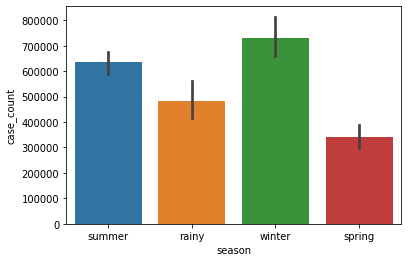

In [25]:
sns.barplot(train_data_segment1['season'],train_data_segment1['case_count'],estimator=sum);

In [26]:
season=pd.get_dummies(train_data_segment1['season'])
train_data_segment1=pd.concat([train_data_segment1,season],axis=1)

In [27]:
train_data_segment1

,application_date,segment,ds,case_count,day,month,year,week,season,rainy,spring,summer,winter
0,2017-04-01,1,train,299.0,1,4,2017,13,summer,0,0,1,0
3,2017-04-03,1,train,42.0,3,4,2017,14,summer,0,0,1,0
5,2017-04-04,1,train,23.0,4,4,2017,14,summer,0,0,1,0
7,2017-04-05,1,train,1530.0,5,4,2017,14,summer,0,0,1,0
10,2017-04-07,1,train,1341.0,7,4,2017,14,summer,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,2019-09-26,1,test,0.0,26,9,2019,39,rainy,1,0,0,0
1798,2019-09-27,1,test,0.0,27,9,2019,39,rainy,1,0,0,0
1800,2019-09-28,1,test,0.0,28,9,2019,39,rainy,1,0,0,0
1802,2019-09-29,1,test,0.0,29,9,2019,39,rainy,1,0,0,0


In [28]:
case_min_max=train_data_segment1.groupby(['week','year'],as_index=False)['case_count'].agg({'min_week':np.min,'max_week':np.max})

In [29]:
case_min_max

,week,year,min_week,max_week
0,1,2018,45.0,8116.0
1,1,2019,125.0,3946.0
2,2,2018,81.0,2757.0
3,2,2019,1815.0,3377.0
4,3,2018,1108.0,2947.0
...,...,...,...,...
127,50,2018,1157.0,3281.0
128,51,2017,757.0,2454.0
129,51,2018,1290.0,3250.0
130,52,2017,2169.0,14106.0


In [30]:
train_data_segment1=pd.merge(train_data_segment1,case_min_max,on=['week','year'])

In [31]:
train_data_segment1

,application_date,segment,ds,case_count,day,month,year,week,season,rainy,spring,summer,winter,min_week,max_week
0,2017-04-01,1,train,299.0,1,4,2017,13,summer,0,0,1,0,299.0,299.0
1,2017-04-03,1,train,42.0,3,4,2017,14,summer,0,0,1,0,23.0,1530.0
2,2017-04-04,1,train,23.0,4,4,2017,14,summer,0,0,1,0,23.0,1530.0
3,2017-04-05,1,train,1530.0,5,4,2017,14,summer,0,0,1,0,23.0,1530.0
4,2017-04-07,1,train,1341.0,7,4,2017,14,summer,0,0,1,0,23.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2019-09-26,1,test,0.0,26,9,2019,39,rainy,1,0,0,0,0.0,0.0
889,2019-09-27,1,test,0.0,27,9,2019,39,rainy,1,0,0,0,0.0,0.0
890,2019-09-28,1,test,0.0,28,9,2019,39,rainy,1,0,0,0,0.0,0.0
891,2019-09-29,1,test,0.0,29,9,2019,39,rainy,1,0,0,0,0.0,0.0


In [32]:
case_min_max_month=train_data_segment1.groupby(['month','year'],as_index=False)['case_count'].agg({'min_month':np.min,'max_month':np.max})

In [33]:
case_min_max_month.head()

,month,year,min_month,max_month
0,1,2018,45.0,9628.0
1,1,2019,125.0,5981.0
2,2,2018,52.0,9134.0
3,2,2019,223.0,5498.0
4,3,2018,58.0,21885.0


In [34]:
train_data_segment1=pd.merge(train_data_segment1,case_min_max_month,on=['month','year'])

In [35]:
train_data_segment1

,application_date,segment,ds,case_count,day,month,year,week,season,rainy,spring,summer,winter,min_week,max_week,min_month,max_month
0,2017-04-01,1,train,299.0,1,4,2017,13,summer,0,0,1,0,299.0,299.0,23.0,6472.0
1,2017-04-03,1,train,42.0,3,4,2017,14,summer,0,0,1,0,23.0,1530.0,23.0,6472.0
2,2017-04-04,1,train,23.0,4,4,2017,14,summer,0,0,1,0,23.0,1530.0,23.0,6472.0
3,2017-04-05,1,train,1530.0,5,4,2017,14,summer,0,0,1,0,23.0,1530.0,23.0,6472.0
4,2017-04-07,1,train,1341.0,7,4,2017,14,summer,0,0,1,0,23.0,1530.0,23.0,6472.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2019-09-26,1,test,0.0,26,9,2019,39,rainy,1,0,0,0,0.0,0.0,0.0,0.0
889,2019-09-27,1,test,0.0,27,9,2019,39,rainy,1,0,0,0,0.0,0.0,0.0,0.0
890,2019-09-28,1,test,0.0,28,9,2019,39,rainy,1,0,0,0,0.0,0.0,0.0,0.0
891,2019-09-29,1,test,0.0,29,9,2019,39,rainy,1,0,0,0,0.0,0.0,0.0,0.0


# for segment 2

In [36]:
train_data_segment2

,application_date,segment,ds,case_count
1,2017-04-01,2,train,897.0
2,2017-04-02,2,train,605.0
4,2017-04-03,2,train,2016.0
6,2017-04-04,2,train,2245.0
8,2017-04-05,2,train,2415.0
...,...,...,...,...
1825,2019-10-20,2,test,0.0
1826,2019-10-21,2,test,0.0
1827,2019-10-22,2,test,0.0
1828,2019-10-23,2,test,0.0


In [37]:
train_data_segment2['day']=train_data_segment2['application_date'].dt.day
train_data_segment2['month']=train_data_segment2['application_date'].dt.month
train_data_segment2['year']=train_data_segment2['application_date'].dt.year
train_data_segment2['week']=train_data_segment2['application_date'].dt.week

In [38]:
list2=[]
for x in train_data_segment2['month']:
    if x==2 or x==3:
            y='spring'
    elif x==4 or x==5 or x==6:
            y='summer'
    elif x==7 or x==8 or x==9:
           y='rainy'
    elif x==10 or x==11 or x==12 or x==1:
            y='winter'
    list2.append(y)

In [39]:
train_data_segment2['season']=list2

In [40]:
train_data_segment2

,application_date,segment,ds,case_count,day,month,year,week,season
1,2017-04-01,2,train,897.0,1,4,2017,13,summer
2,2017-04-02,2,train,605.0,2,4,2017,13,summer
4,2017-04-03,2,train,2016.0,3,4,2017,14,summer
6,2017-04-04,2,train,2245.0,4,4,2017,14,summer
8,2017-04-05,2,train,2415.0,5,4,2017,14,summer
...,...,...,...,...,...,...,...,...,...
1825,2019-10-20,2,test,0.0,20,10,2019,42,winter
1826,2019-10-21,2,test,0.0,21,10,2019,43,winter
1827,2019-10-22,2,test,0.0,22,10,2019,43,winter
1828,2019-10-23,2,test,0.0,23,10,2019,43,winter


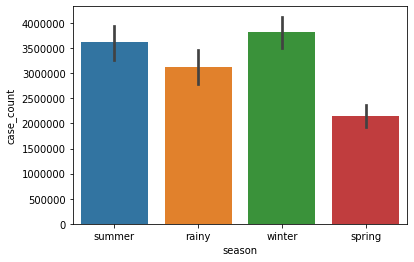

In [41]:
sns.barplot(train_data_segment2['season'],train_data_segment2['case_count'],estimator=sum);

In [42]:
season1=pd.get_dummies(train_data_segment2['season'])
train_data_segment2=pd.concat([train_data_segment2,season1],axis=1)

In [43]:
train_data_segment2

,application_date,segment,ds,case_count,day,month,year,week,season,rainy,spring,summer,winter
1,2017-04-01,2,train,897.0,1,4,2017,13,summer,0,0,1,0
2,2017-04-02,2,train,605.0,2,4,2017,13,summer,0,0,1,0
4,2017-04-03,2,train,2016.0,3,4,2017,14,summer,0,0,1,0
6,2017-04-04,2,train,2245.0,4,4,2017,14,summer,0,0,1,0
8,2017-04-05,2,train,2415.0,5,4,2017,14,summer,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,2019-10-20,2,test,0.0,20,10,2019,42,winter,0,0,0,1
1826,2019-10-21,2,test,0.0,21,10,2019,43,winter,0,0,0,1
1827,2019-10-22,2,test,0.0,22,10,2019,43,winter,0,0,0,1
1828,2019-10-23,2,test,0.0,23,10,2019,43,winter,0,0,0,1


In [44]:
case_min_max1=train_data_segment2.groupby(['week','year'],as_index=False)['case_count'].agg({'min_week':np.min,'max_week':np.max})

In [45]:
case_min_max1

,week,year,min_week,max_week
0,1,2018,2110.0,10467.0
1,1,2019,4408.0,6723.0
2,2,2018,10306.0,26325.0
3,2,2019,6452.0,26872.0
4,3,2018,14284.0,28950.0
...,...,...,...,...
130,50,2018,7111.0,29512.0
131,51,2017,13367.0,27934.0
132,51,2018,17015.0,33782.0
133,52,2017,791.0,13929.0


In [46]:
train_data_segment2=pd.merge(train_data_segment2,case_min_max1,on=['week','year'])

In [47]:
train_data_segment2

,application_date,segment,ds,case_count,day,month,year,week,season,rainy,spring,summer,winter,min_week,max_week
0,2017-04-01,2,train,897.0,1,4,2017,13,summer,0,0,1,0,605.0,897.0
1,2017-04-02,2,train,605.0,2,4,2017,13,summer,0,0,1,0,605.0,897.0
2,2017-04-03,2,train,2016.0,3,4,2017,14,summer,0,0,1,0,1435.0,2415.0
3,2017-04-04,2,train,2245.0,4,4,2017,14,summer,0,0,1,0,1435.0,2415.0
4,2017-04-05,2,train,2415.0,5,4,2017,14,summer,0,0,1,0,1435.0,2415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2019-10-20,2,test,0.0,20,10,2019,42,winter,0,0,0,1,0.0,0.0
933,2019-10-21,2,test,0.0,21,10,2019,43,winter,0,0,0,1,0.0,0.0
934,2019-10-22,2,test,0.0,22,10,2019,43,winter,0,0,0,1,0.0,0.0
935,2019-10-23,2,test,0.0,23,10,2019,43,winter,0,0,0,1,0.0,0.0


In [48]:
case_min_max_month1=train_data_segment2.groupby(['month','year'],as_index=False)['case_count'].agg({'min_month':np.min,'max_month':np.max})

In [49]:
case_min_max_month1

,month,year,min_month,max_month
0,1,2018,1302.0,28950.0
1,1,2019,2177.0,33126.0
2,2,2018,206.0,32399.0
3,2,2019,2300.0,31478.0
4,3,2018,706.0,33322.0
5,3,2019,1357.0,38345.0
6,4,2017,605.0,12384.0
7,4,2018,710.0,28869.0
8,4,2019,1235.0,29305.0
9,5,2017,747.0,13979.0


In [50]:
train_data_segment2=pd.merge(train_data_segment2,case_min_max_month1,on=['month','year'])

In [51]:
train_data_segment2

,application_date,segment,ds,case_count,day,month,year,week,season,rainy,spring,summer,winter,min_week,max_week,min_month,max_month
0,2017-04-01,2,train,897.0,1,4,2017,13,summer,0,0,1,0,605.0,897.0,605.0,12384.0
1,2017-04-02,2,train,605.0,2,4,2017,13,summer,0,0,1,0,605.0,897.0,605.0,12384.0
2,2017-04-03,2,train,2016.0,3,4,2017,14,summer,0,0,1,0,1435.0,2415.0,605.0,12384.0
3,2017-04-04,2,train,2245.0,4,4,2017,14,summer,0,0,1,0,1435.0,2415.0,605.0,12384.0
4,2017-04-05,2,train,2415.0,5,4,2017,14,summer,0,0,1,0,1435.0,2415.0,605.0,12384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2019-10-20,2,test,0.0,20,10,2019,42,winter,0,0,0,1,0.0,0.0,0.0,0.0
933,2019-10-21,2,test,0.0,21,10,2019,43,winter,0,0,0,1,0.0,0.0,0.0,0.0
934,2019-10-22,2,test,0.0,22,10,2019,43,winter,0,0,0,1,0.0,0.0,0.0,0.0
935,2019-10-23,2,test,0.0,23,10,2019,43,winter,0,0,0,1,0.0,0.0,0.0,0.0



# segment 1

In [52]:
train_data_segment1

,application_date,segment,ds,case_count,day,month,year,week,season,rainy,spring,summer,winter,min_week,max_week,min_month,max_month
0,2017-04-01,1,train,299.0,1,4,2017,13,summer,0,0,1,0,299.0,299.0,23.0,6472.0
1,2017-04-03,1,train,42.0,3,4,2017,14,summer,0,0,1,0,23.0,1530.0,23.0,6472.0
2,2017-04-04,1,train,23.0,4,4,2017,14,summer,0,0,1,0,23.0,1530.0,23.0,6472.0
3,2017-04-05,1,train,1530.0,5,4,2017,14,summer,0,0,1,0,23.0,1530.0,23.0,6472.0
4,2017-04-07,1,train,1341.0,7,4,2017,14,summer,0,0,1,0,23.0,1530.0,23.0,6472.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2019-09-26,1,test,0.0,26,9,2019,39,rainy,1,0,0,0,0.0,0.0,0.0,0.0
889,2019-09-27,1,test,0.0,27,9,2019,39,rainy,1,0,0,0,0.0,0.0,0.0,0.0
890,2019-09-28,1,test,0.0,28,9,2019,39,rainy,1,0,0,0,0.0,0.0,0.0,0.0
891,2019-09-29,1,test,0.0,29,9,2019,39,rainy,1,0,0,0,0.0,0.0,0.0,0.0


In [53]:
# x=train_data_segment1[['month','day','year','segment','week','rainy','spring','winter','min_week','max_week','min_month','max_month']]
train_data_segment1.drop(['season'], inplace=True, axis=1)

In [54]:
train1 =  train_data_segment1[train_data_segment1["ds"] == "train"]
test1 =  train_data_segment1[train_data_segment1["ds"] == "test"]

In [55]:
train_data_segment1.shape,  train_data_segment2.shape,

((893, 16), (937, 17))

In [56]:
train1.shape, test1.shape,

((806, 16), (87, 16))

In [57]:
train1.drop(['ds','application_date'], inplace=True, axis=1)
test1.drop(['ds','case_count'], inplace=True, axis=1)
test1_date = test1.pop('application_date')
y1=train1.pop('case_count')

In [58]:
x_train, x_test, y_train, y_test = train_test_split(train1, y1, test_size = 0.25, random_state = 40)

In [59]:
model1=rf().fit(x_train,y_train)

In [60]:
y_pred1=model1.predict(x_test)

In [61]:
mean_absolute_error(y_test,y_pred1)

782.5376237623761

In [62]:
test1.columns

Index(['segment', 'day', 'month', 'year', 'week', 'rainy', 'spring', 'summer',
       'winter', 'min_week', 'max_week', 'min_month', 'max_month'],
      dtype='object')

In [63]:
pred1=model1.predict(test1)

In [64]:
pred1.shape

(87,)

# segment2

In [65]:
train_data_segment2

,application_date,segment,ds,case_count,day,month,year,week,season,rainy,spring,summer,winter,min_week,max_week,min_month,max_month
0,2017-04-01,2,train,897.0,1,4,2017,13,summer,0,0,1,0,605.0,897.0,605.0,12384.0
1,2017-04-02,2,train,605.0,2,4,2017,13,summer,0,0,1,0,605.0,897.0,605.0,12384.0
2,2017-04-03,2,train,2016.0,3,4,2017,14,summer,0,0,1,0,1435.0,2415.0,605.0,12384.0
3,2017-04-04,2,train,2245.0,4,4,2017,14,summer,0,0,1,0,1435.0,2415.0,605.0,12384.0
4,2017-04-05,2,train,2415.0,5,4,2017,14,summer,0,0,1,0,1435.0,2415.0,605.0,12384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2019-10-20,2,test,0.0,20,10,2019,42,winter,0,0,0,1,0.0,0.0,0.0,0.0
933,2019-10-21,2,test,0.0,21,10,2019,43,winter,0,0,0,1,0.0,0.0,0.0,0.0
934,2019-10-22,2,test,0.0,22,10,2019,43,winter,0,0,0,1,0.0,0.0,0.0,0.0
935,2019-10-23,2,test,0.0,23,10,2019,43,winter,0,0,0,1,0.0,0.0,0.0,0.0


In [66]:
# x1=train_data_segment2[['month','day','year','segment','week','rainy','spring','winter','min_week','max_week','min_month','max_month']]
# y1=train_data_segment2['case_count']

train_data_segment2.drop(['season'], inplace=True, axis=1)

In [67]:
train2 =  train_data_segment2[train_data_segment2["ds"] == "train"]
test2 =  train_data_segment2[train_data_segment2["ds"] == "test"]

train2.drop(['ds','application_date'], inplace=True, axis=1)
test2.drop(['ds','case_count'], inplace=True, axis=1)
test2_date = test2.pop('application_date')
y2=train2.pop('case_count')

In [68]:
train_data_segment2.shape , train_data_segment1.shape , y2.shape, y1.shape

((937, 16), (893, 16), (844,), (806,))

In [69]:
train2.shape, test2.shape , train1.shape, test1.shape

((844, 13), (93, 13), (806, 13), (87, 13))

In [70]:
(train2 + test2).shape , (train1 + test1).shape

((937, 13), (893, 13))

In [71]:
train2.shape

(844, 13)

In [72]:
train2.columns

Index(['segment', 'day', 'month', 'year', 'week', 'rainy', 'spring', 'summer',
       'winter', 'min_week', 'max_week', 'min_month', 'max_month'],
      dtype='object')

In [73]:
train2.head(2)

,segment,day,month,year,week,rainy,spring,summer,winter,min_week,max_week,min_month,max_month
0,2,1,4,2017,13,0,0,1,0,605.0,897.0,605.0,12384.0
1,2,2,4,2017,13,0,0,1,0,605.0,897.0,605.0,12384.0


In [74]:
x_train, x_test, y_train, y_test = train_test_split(train2, y2,test_size = 0.25, random_state = 20)

In [75]:
model2=rf().fit(x_train,y_train)

In [76]:
y_pred2=model2.predict(x_test)

In [77]:
mean_absolute_error(y_test,y_pred2)

2731.7677725118483

In [78]:
pred2=model2.predict(test2)

In [79]:
test2.head(1)

,segment,day,month,year,week,rainy,spring,summer,winter,min_week,max_week,min_month,max_month
844,2,24,7,2019,30,1,0,0,0,0.0,29183.0,0.0,32547.0


In [80]:
pred2.shape , x_test.shape , test2.shape , y_train.shape, train2.shape 

((93,), (211, 13), (93, 13), (633,), (844, 13))

In [81]:
x_train.shape , y_train.shape, x_test.shape , y_test.shape

((633, 13), (633,), (211, 13), (211,))

In [82]:
(x_train + x_test).shape , train_data_segment2.shape

((844, 13), (937, 16))

In [83]:
pred2

array([22601.1, 23495.5, 21232.4, 20194.8, 18297.1,  3274.7,  1327.3,
        1647.3,  1834.9,  2009.5,  1916.2,  2076.6,  1850.6,  1856.5,
        1995.7,  2021. ,  1973.6,  1973.6,  1973.6,  1973.6,  1973.6,
        1973.6,  2267.4,  2267.4,  2267.4,  2267.4,  2267.4,  2267.4,
        2267.4,  2267.4,  2267.4,  2267.4,  2267.4,  2213.3,  2430.5,
        2356.4,  2353.4,  1084. ,  1335.8,  1834.9,  2009.5,  1916.2,
        2076.6,  1850.6,  1856.5,  1995.7,  2021. ,  1973.6,  1973.6,
        1973.6,  1973.6,  1973.6,  1973.6,  2267.4,  2267.4,  2267.4,
        2267.4,  2267.4,  2267.4,  2267.4,  2267.4,  2267.4,  2267.4,
        2267.4,  2213.3,  2430.5,  2356.4,  2353.4,  1084. ,  1834.9,
        2009.5,  1916.2,  2076.6,  1850.6,  1856.5,  1995.7,  2021. ,
        1973.6,  1973.6,  1973.6,  1973.6,  1973.6,  1973.6,  2267.4,
        2267.4,  2267.4,  2267.4,  2267.4,  2267.4,  2267.4,  2267.4,
        2267.4,  2267.4])

In [84]:
pred1

array([1365. ,  904.6,  426.1,  721.9,  721.9,  706. ,  701.1,  660.3,
        702.2,  702.2,  702.2,  702.2,  671. ,  817.2,  882.1,  882.1,
        903.7,  774.1,  774.1,  774.1,  774.1,  687.8,  963. ,  940. ,
        958.6, 4462.3, 1004.2,  960.4,  703. ,  703. ,  663.3,  302.6,
        342.3,  426.1,  721.9,  721.9,  706. ,  701.1,  660.3,  702.2,
        702.2,  702.2,  702.2,  671. ,  817.2,  882.1,  882.1,  903.7,
        774.1,  774.1,  774.1,  774.1,  687.8,  963. ,  940. ,  958.6,
       4462.3,  916.2,  872.4,  615. ,  615. ,  588.8,  323.3,  354.3,
        426.1,  721.9,  721.9,  706. ,  701.1,  660.3,  702.2,  702.2,
        702.2,  702.2,  671. ,  817.2,  882.1,  882.1,  903.7,  774.1,
        774.1,  774.1,  774.1,  687.8,  963. ,  940. ,  958.6])

In [85]:
seg1_df = pd.DataFrame()
seg1_df['id'] = range(1,88)
seg1_df['application_date'] = test1_date.values
seg1_df['segment'] = 1
seg1_df['case_count'] = pred1

seg2_df = pd.DataFrame()
seg2_df['id'] = range(88,181)
seg2_df['application_date'] = test2_date.values
seg2_df['segment'] = 2
seg2_df['case_count'] = pred2

In [86]:
res_df = pd.concat([seg1_df, seg2_df])
res_df.to_csv('final_submission_3.csv', index=False)

In [87]:
res_df.describe()

,id,segment,case_count
count,180.000000,180.000000,180.000000
mean,90.500000,1.516667,2010.265556
std,52.105662,0.501116,3349.101892
min,1.000000,1.000000,302.600000
25%,45.750000,1.000000,721.900000
50%,90.500000,2.000000,1741.100000
75%,135.250000,2.000000,2267.400000
max,180.000000,2.000000,23495.500000
